
Created on Wed Oct 24 16:19:49 2018

@author: xiang




c:\users\xiang\documents\xiang\venv_new\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
c:\users\xiang\documents\xiang\venv_new\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


n_digits: 26, 	 n_samples 20000, 	 n_features 16
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


c:\users\xiang\documents\xiang\venv_new\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


k-means++	7.20s	121172	0.366	0.373	0.370	0.150	0.363	0.111
__________________________________________________________________________________


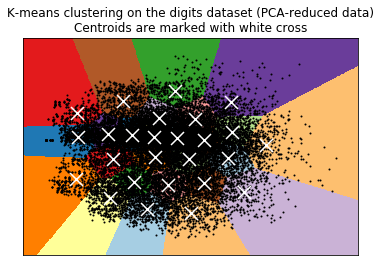

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 24 16:19:49 2018

@author: xiang
"""

print(__doc__)

from IPython import get_ipython
get_ipython().magic('reset -sf')
get_ipython().magic('clear')

from sklearn.pipeline import Pipeline
from sklearn import neighbors, preprocessing
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit
from time import time

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

filename = 'Letter.csv'
data = np.genfromtxt(filename, delimiter=',', dtype='str')
sample_data = data[:,1:].astype(np.float32)
num_of_features = sample_data.shape[1];
sample_data = scale(sample_data)

sample_target = data[:,0]
#Transform the labels
le = preprocessing.LabelEncoder()
le.fit(sample_target.ravel())
sample_target = le.transform(sample_target.ravel()).reshape(sample_target.shape) 

labels = np.unique(sample_target)
num_labels = labels.size
sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d" % (num_labels, sample_data.shape[0], num_of_features))

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

def k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    #print(metrics.homogeneity_score(sample_target, estimator.labels_))
    
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(sample_target, estimator.labels_),
             metrics.completeness_score(sample_target, estimator.labels_),
             metrics.v_measure_score(sample_target, estimator.labels_),
             metrics.adjusted_rand_score(sample_target, estimator.labels_),
             metrics.adjusted_mutual_info_score(sample_target,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

estimator = KMeans(init='k-means++', n_clusters=num_labels, n_init=10)
k_means(estimator = estimator,name="k-means++", data=sample_data)

label_comparison = np.c_[sample_target, estimator.labels_]
label_comparison2 = label_comparison[label_comparison[:, 0].argsort()]

#estimator.predict(sample_data)

#k_means(KMeans(init='random', n_clusters=num_labels, n_init=10),
#              name="random", data=sample_data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
#min(num_labels,num_of_features)
#pca = PCA(n_components='mle').fit(sample_data)
#k_means(KMeans(init=pca.components_, n_clusters=num_labels, n_init=1),
#               name="PCA-based",
#               data=sample_data)

print(82 * '_')

reduced_data = PCA(n_components=2).fit_transform(sample_data)
kmeans = KMeans(init='k-means++', n_clusters=num_labels, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot t​#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 24 16:19:49 2018

@author: xiang
"""

print(__doc__)

from IPython import get_ipython
get_ipython().magic('reset -sf')
get_ipython().magic('clear')

from sklearn.pipeline import Pipeline
from sklearn import neighbors, preprocessing
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit
from time import time

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

filename = 'Letter.csv'
data = np.genfromtxt(filename, delimiter=',', dtype='str')
sample_data = data[:,1:].astype(np.float32)
num_of_features = sample_data.shape[1];
sample_data = scale(sample_data)

sample_target = data[:,0]
#Transform the labels
le = preprocessing.LabelEncoder()
le.fit(sample_target.ravel())
sample_target = le.transform(sample_target.ravel()).reshape(sample_target.shape) 

labels = np.unique(sample_target)
num_labels = labels.size
sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d" % (num_labels, sample_data.shape[0], num_of_features))

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

def k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    #print(metrics.homogeneity_score(sample_target, estimator.labels_))
    
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(sample_target, estimator.labels_),
             metrics.completeness_score(sample_target, estimator.labels_),
             metrics.v_measure_score(sample_target, estimator.labels_),
             metrics.adjusted_rand_score(sample_target, estimator.labels_),
             metrics.adjusted_mutual_info_score(sample_target,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

estimator = KMeans(init='k-means++', n_clusters=num_labels, n_init=10)
k_means(estimator = estimator,name="k-means++", data=sample_data)

label_comparison = np.c_[sample_target, estimator.labels_]
label_comparison2 = label_comparison[label_comparison[:, 0].argsort()]

#estimator.predict(sample_data)

#k_means(KMeans(init='random', n_clusters=num_labels, n_init=10),
#              name="random", data=sample_data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
#min(num_labels,num_of_features)
#pca = PCA(n_components='mle').fit(sample_data)
#k_means(KMeans(init=pca.components_, n_clusters=num_labels, n_init=1),
#               name="PCA-based",
#               data=sample_data)

print(82 * '_')

reduced_data = PCA(n_components=2).fit_transform(sample_data)
kmeans = KMeans(init='k-means++', n_clusters=num_labels, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()he decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [3]:
import tensorflow as tf

ImportError: Could not find 'cudart64_90.dll'. TensorFlow requires that this DLL be installed in a directory that is named in your %PATH% environment variable. Download and install CUDA 9.0 from this URL: https://developer.nvidia.com/cuda-toolkit